<a href="https://colab.research.google.com/github/Samsonite27/Samsonite27.github.io/blob/main/Fourier_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.0015048408052261253+0j)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


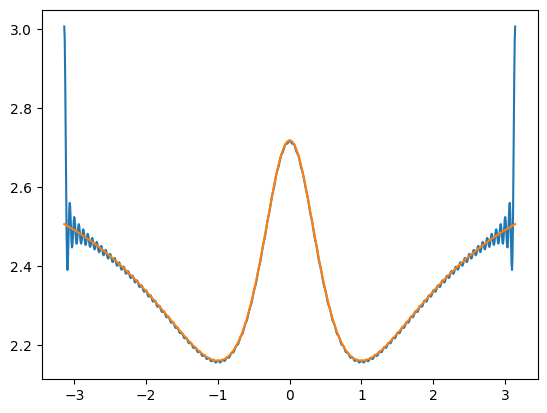

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def psi(x):
  return np.exp(1/(1 + (np.tan(x/(x**2+1)))**2))

def mean_squared_error(array1, array2):
  sum = 0
  for i in range(len(array1)):
    sum += (array1[i] - array2[i]) ** 2
  return sum/len(array1)

def approximate_integral(function, a, b, num_partitions):
    length = (b - a) / num_partitions
    partitions = np.linspace(a, b, int(num_partitions))
    partition_area = [length * function(i) for i in partitions]
    return sum(partition_area)

def multiply(function1, function2):
    def output(i):
        return function1(i) * function2(i)
    return output

def stretch(function, k):
    def fun_k(x):
        return function(k * x)
    return fun_k

def fourier(constant, a_seq, b_seq):
  def output_function(x):
    output = constant
    for i in range(len(a_seq)):
      output += a_seq[i] * np.cos((i+1)*x) + b_seq[i] * np.sin((i+1)*x)
    return output
  return output_function

def get_ith_fourier_complex_coefficient(function, i, num=1e3):

  real_part = (1 / (2 * np.pi)) * approximate_integral(multiply(function, stretch(np.cos, i)), -np.pi, np.pi, num)
  imaginary_part = (-1 / (2 * np.pi)) * approximate_integral(multiply(function, stretch(np.sin, i)), -np.pi, np.pi, num)

  return complex(real_part, imaginary_part)

def get_real_fourier_coefficients(function, k):
  constant = get_ith_fourier_complex_coefficient(function, 0)
  a_seq = [2 * get_ith_fourier_complex_coefficient(function, i).real for i in range(1, k + 1)]
  b_seq = [-2 * get_ith_fourier_complex_coefficient(function, i).imag for i in range(1, k + 1)]

  return (constant, a_seq, b_seq)

def find_fourier(function, k):
    return fourier(*get_real_fourier_coefficients(function, k))

psi_fourier = find_fourier(psi, 100)

x_values = np.linspace(-np.pi, np.pi, 1000)
true_values = psi(x_values)
approx_values = [psi_fourier(x) for x in x_values]

print(mean_squared_error(true_values, approx_values))

plt.plot(x_values, approx_values)
plt.plot(x_values, true_values)








